## Assignment - High Frequency Words
#### Summer 2021
**Authors:** GOAT Team (Esteban Aramayo, Ethan Haley, Claire Meyer, and Tyler Frankenburg)

**The first part below is an analysis of the distribution of wordcounts in the Project Gutenberg eBook version of "Don Quijote", by Miguel de Cervantes Saavedra.**  

**The second part moves 400 years forward, into the present, and inspects the same distribution on a much larger corpus, properly lemmatized this time.**

In [71]:
import nltk
from urllib import request
from nltk import word_tokenize
import matplotlib.pyplot as plt

Start by accessing the UTF-8 version of the text on Project Gutenberg's website.

In [5]:
url = 'https://gutenberg.org/files/2000/2000-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
type(raw)

str

In [6]:
len(raw)

2168460

In [7]:
raw[:99]

'\ufeffThe Project Gutenberg eBook of Don Quijote, by Miguel de Cervantes Saavedra\r\n\r\nThis eBook is for t'

In [8]:
# Break the raw string into tokens
tokens = word_tokenize(raw)
len(tokens)

447847

In [26]:
# randomly chosen sample
print(tokens[1100:1111])

['con', 'su', 'ama', ',', 'y', 'es', 'uno', 'de', 'los', 'importantes', 'capítulos']


Remove the header and footer around the book text

In [25]:
start = tokens.index('El')
print(tokens[start:start+11])

['El', 'ingenioso', 'hidalgo', 'don', 'Quijote', 'de', 'la', 'Mancha', 'por', 'Miguel', 'de']


In [17]:
end = tokens[::-1].index('Fin')
tokens[-11-end:-end]

['caer', 'del', 'todo', ',', 'sin', 'duda', 'alguna', '.', 'Vale', '.', 'Fin']

In [18]:
tokens = tokens[start:-end]

In [19]:
text = nltk.Text(tokens)

In [41]:
print(text[-11:])

['caer', 'del', 'todo', ',', 'sin', 'duda', 'alguna', '.', 'Vale', '.', 'Fin']


In [28]:
from collections import Counter

In [36]:
wordcounts = Counter([str.lower(t) for t in text]) 

In [43]:
print(wordcounts.most_common(200))

[(',', 40277), ('que', 20727), ('de', 18392), ('y', 18242), ('la', 10490), ('a', 9854), ('en', 8267), ('el', 8262), ('.', 7972), ('no', 6235), (';', 4802), ('los', 4766), ('se', 4752), ('con', 4265), ('por', 3899), ('lo', 3489), ('las', 3482), ('le', 3407), ('su', 3388), ('—', 2988), ('don', 2714), ('del', 2536), ('me', 2344), ('como', 2260), ('es', 2112), ('yo', 2060), ('más', 2055), (':', 2047), ('si', 1957), ('un', 1942), ('al', 1753), ('quijote', 1719), ('mi', 1701), ('sancho', 1667), ('para', 1448), ('porque', 1391), ('ni', 1375), ('una', 1334), ('él', 1274), ('tan', 1233), ('o', 1215), ('todo', 1179), ('sin', 1156), ('señor', 1064), ('así', 1060), ('ser', 1059), ('sus', 1051), ('ha', 1049), ('bien', 1041), ('había', 1035), ('pero', 1015), ('?', 960), ('dijo', 933), ('merced', 900), ('esto', 884), ('—dijo', 874), ('pues', 853), ('vuestra', 851), ('todos', 818), ('—respondió', 803), ('ya', 778), ('cuando', 758), ('era', 753), ('te', 726), ('donde', 721), ('cual', 704), ('sino', 694

Make sure the accents aren't getting lost in translation.

In [64]:
print(wordcounts["él"], wordcounts["el"])

1282 8263


Remove those long dashes, whatever they are, and also the question marks attached to the words

In [56]:
'sancho—'.strip('—¿?')

'sancho'

In [63]:
wordcounts = Counter([str.lower(t).strip('—¿?') for t in text])

Now remove punctuation

In [66]:
for word in list(wordcounts): # need list for stability during iteration
    if not str.isalpha(word):
        del wordcounts[word]

In [68]:
wordcounts['dijo']  # before: ('dijo', 933), ('—dijo', 874)

1808

#### A numerical breakdown of the wordcounts:

In [85]:
print(f"There are {len(tokens)} words in Don Quijote, and {len(wordcounts)} unique words.")

There are 444359 words in Don Quijote, and 22826 unique words.


In [104]:
def getToX(countlist, X):
    total = 0
    numItems = 0
    gener = (tup for tup in countlist)
    while total < X:
        item = next(gener)
        numItems += 1
        total += item[1] # since we're using tuples of (word, count)
    return numItems

print()
print()
print(f"""The smallest number of unique words that account for half of the total words is 
      {getToX(wordcounts.most_common(200), len(tokens) / 2)}""")



The smallest number of unique words that account for half of the total words is 
      127


In [69]:
print(wordcounts.most_common(200))

[('que', 20761), ('de', 18408), ('y', 18268), ('la', 10492), ('a', 9866), ('en', 8279), ('el', 8263), ('no', 6321), ('los', 4766), ('se', 4752), ('con', 4274), ('por', 3937), ('lo', 3491), ('las', 3484), ('le', 3419), ('su', 3388), ('don', 2714), ('del', 2536), ('me', 2344), ('como', 2268), ('quijote', 2241), ('sancho', 2174), ('es', 2143), ('yo', 2069), ('más', 2055), ('si', 1964), ('un', 1943), ('dijo', 1808), ('al', 1754), ('mi', 1702), ('para', 1460), ('porque', 1392), ('ni', 1376), ('una', 1334), ('él', 1282), ('tan', 1240), ('o', 1217), ('todo', 1180), ('sin', 1156), ('señor', 1064), ('respondió', 1063), ('así', 1061), ('ser', 1059), ('ha', 1052), ('sus', 1051), ('bien', 1043), ('había', 1036), ('pero', 1015), ('merced', 900), ('esto', 886), ('pues', 857), ('vuestra', 851), ('qué', 835), ('todos', 818), ('ya', 781), ('cuando', 758), ('era', 757), ('te', 726), ('donde', 721), ('cual', 704), ('sino', 694), ('dos', 684), ('caballero', 677), ('fue', 655), ('este', 643), ('esta', 630)

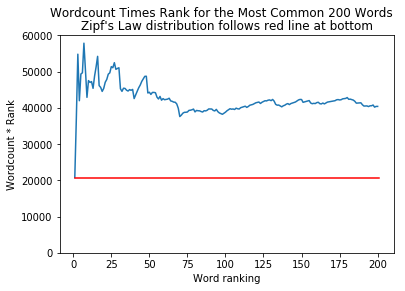

In [151]:
# isolate the ordered counts
counts = list(zip(*wordcounts.most_common(200)))[1]
plt.plot(range(1,201), [(rank+1) * count for rank, count in enumerate(counts)])
plt.plot((1,201),(counts[0],counts[0]), color='r')
plt.suptitle("Wordcount Times Rank for the Most Common 200 Words")
plt.title("Zipf's Law distribution follows red line at bottom")
plt.xlabel('Word ranking')
plt.ylabel('Wordcount * Rank')
plt.ylim(0,6e4);

Zipf's Law doesn't fit this Spanish corpus from over 400 years ago, comprised of two books published 12 years apart, and often considered the first modern novel.  Part of the reason is that, as the analysis above stands, different forms of a single lemma are not combined in their counts.  For example, the articles "el", "la", "los", and "las" combined would have the highest wordcount, as "the" does in English.  And other words combine with those articles further down the list, for example "del" is a contraction of "de" and "el", yet counts toward neither one's wordcount above.  At the same time, "la", "los", and "las" can be used as pronouns meaning "it"/"her" or "them", so you need to dig pretty deep into the grammar to lemmatize and count everything fairly.

Fortunately, that's exactly the type of task the Real Academia Española lives for and has been tackling for the last 14 years.  So far they've analyzed 316,000 documents of all sorts, both written and transcribed from oral recordings, across the Spanish-speaking world, and all from this century.  The 333 million words in the corpus contain 93 million from fiction (novels, stories, screenplays, plays) and 238 million from non-fiction (periodicals of all sorts, blogs, books, interviews).  The Academy lemmatized the words and compiled the frequency counts on their website, which we can download.

In [127]:
url = "https://apps2.rae.es/CORPES2/estad/1000_lemas.txt"
top1000 = request.urlopen(url)
top1000 = top1000.readlines()
len(top1000)

1002

In [128]:
top1000[:11]

[b'\xef\xbb\xbfLema     Clase   Frec.   Frec-   Frec.           \n',
 b'                gral.   norm.   norm. (sin signos ort.)\n',
 b'el\tT\t27019003\t83588.6\t96060.4\n',
 b',\tY\t18161940\t56187.5\t64571\n',
 b'de\tP\t17497204\t54131\t62207.6\n',
 b'.\tY\t12299865\t38052\t43729.6\n',
 b'y\tC\t8125486\t25137.8\t28888.5\n',
 b'en\tP\t7760858\t24009.7\t27592.1\n',
 b'uno\tQ\t5934736\t18360.3\t21099.7\n',
 b'a\tP\t5491231\t16988.2\t19522.9\n',
 b'que\tH\t4929865\t15251.5\t17527.1\n']

In [133]:
# Remove header, decode, split on tabs, and keep only the word, POS, and count
top1000 = [line.decode('utf-8').split('\t')[:3] for line in top1000[2:]]
top1000[:11]

[['el', 'T', '27019003'],
 [',', 'Y', '18161940'],
 ['de', 'P', '17497204'],
 ['.', 'Y', '12299865'],
 ['y', 'C', '8125486'],
 ['en', 'P', '7760858'],
 ['uno', 'Q', '5934736'],
 ['a', 'P', '5491231'],
 ['que', 'H', '4929865'],
 ['ser', 'V', '4693557'],
 ['se', 'L', '4507615']]

In [134]:
# Remove punctuation
top1000 = [t for t in top1000 if str.isalpha(t[0])]
top1000[:11]

[['el', 'T', '27019003'],
 ['de', 'P', '17497204'],
 ['y', 'C', '8125486'],
 ['en', 'P', '7760858'],
 ['uno', 'Q', '5934736'],
 ['a', 'P', '5491231'],
 ['que', 'H', '4929865'],
 ['ser', 'V', '4693557'],
 ['se', 'L', '4507615'],
 ['que', 'C', '3707937'],
 ['del', 'E', '3179032']]

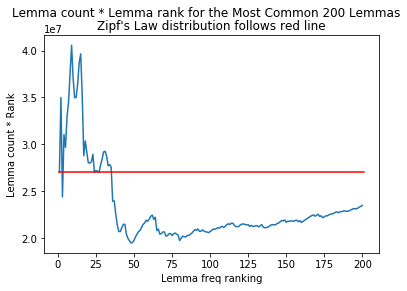

In [146]:
plt.plot(range(1,201), [(rank+1) * int(lemma[2]) for rank, lemma in enumerate(top1000[:200])])
plt.plot((1,201),(int(top1000[0][2]), int(top1000[0][2])), color='r')
plt.suptitle("Lemma count * Lemma rank for the Most Common 200 Lemmas")
plt.title("Zipf's Law distribution follows red line")
plt.xlabel('Lemma freq ranking')
plt.ylabel('Lemma count * Rank');

In [147]:
top1000[45:55]

[['ya', 'R', '433894'],
 ['sin', 'P', '419557'],
 ['dos', 'M', '405831'],
 ['saber', 'V', '398477'],
 ['te', 'L', '394981'],
 ['primero', 'M', '394685'],
 ['nos', 'L', '392832'],
 ['mismo', 'Q', '390368'],
 ['desde', 'P', '385625'],
 ['muy', 'R', '384153']]

At first glance, the distribution doesn't adhere too closely to the Zipf's Law line, but when you look at the y-axis scale, you see that the numbers are in a somewhat tight range.  Spanish lemmas near the top 30 frequencies are more similar in count than English ones, and they drop off more quickly after that.

Same chart, but with larger y-scale:

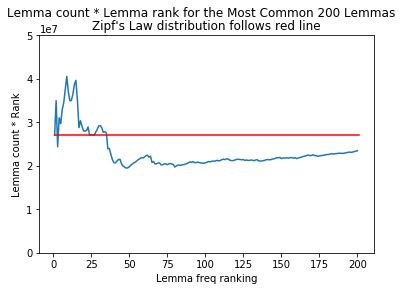

In [149]:
plt.plot(range(1,201), [(rank+1) * int(lemma[2]) for rank, lemma in enumerate(top1000[:200])])
plt.plot((1,201),(int(top1000[0][2]), int(top1000[0][2])), color='r')
plt.suptitle("Lemma count * Lemma rank for the Most Common 200 Lemmas")
plt.title("Zipf's Law distribution follows red line")
plt.xlabel('Lemma freq ranking')
plt.ylabel('Lemma count * Rank')
plt.ylim(0,5e7);